# Einleitung: Entscheidungsbäume

# Vorbereiten der Daten

In [2]:
import pandas as pd

fname = "daten/01_titanic/train.csv"
df_train = pd.read_csv( fname )
df_train_small = df_train[ ["Age", "Pclass", "Sex", "Survived"] ]
df_train_small_onehot = pd.get_dummies(df_train_small, columns=["Sex"])
df_train_small_onehot_nanfiltered = df_train_small_onehot.dropna()
df_train_small_onehot_nanfiltered

,Age,Pclass,Survived,Sex_female,Sex_male
0,22.0,3,0,0,1
1,38.0,1,1,1,0
2,26.0,3,1,1,0
3,35.0,1,1,1,0
4,35.0,3,0,0,1
...,...,...,...,...,...
885,39.0,3,0,1,0
886,27.0,2,0,0,1
887,19.0,1,1,1,0
889,26.0,1,1,0,1


In [3]:
x = df_train_small_onehot_nanfiltered[ ["Age", "Pclass", "Sex_female", "Sex_male"] ].values
y = df_train_small_onehot_nanfiltered[ "Survived" ].values


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

# Entscheidungsbaum lernen

In [6]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

# Entscheidungsbaum anwenden

In [7]:
y_pred_test = clf.predict( x_test )

In [9]:
y_pred_test

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [10]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

# Testen wie gut der Entscheidungsbaum ist

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_test)

0.8041958041958042

# Entscheidungsbaum visualisieren

In [14]:
text_representation = tree.export_text(clf)
print(text_representation)

# tree.plot_tree(clf)

|--- feature_2 <= 0.28
|   |--- feature_0 <= -1.15
|   |   |--- feature_1 <= 0.31
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.31
|   |   |   |--- feature_0 <= -1.25
|   |   |   |   |--- feature_0 <= -1.39
|   |   |   |   |   |--- feature_0 <= -1.87
|   |   |   |   |   |   |--- feature_0 <= -1.94
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  -1.94
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  -1.87
|   |   |   |   |   |   |--- feature_0 <= -1.60
|   |   |   |   |   |   |   |--- feature_0 <= -1.80
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  -1.80
|   |   |   |   |   |   |   |   |--- feature_0 <= -1.70
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  -1.70
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  -1.60
|   |   |   |   |   |   |   |--- feature_0 <= -1.49
|   |  

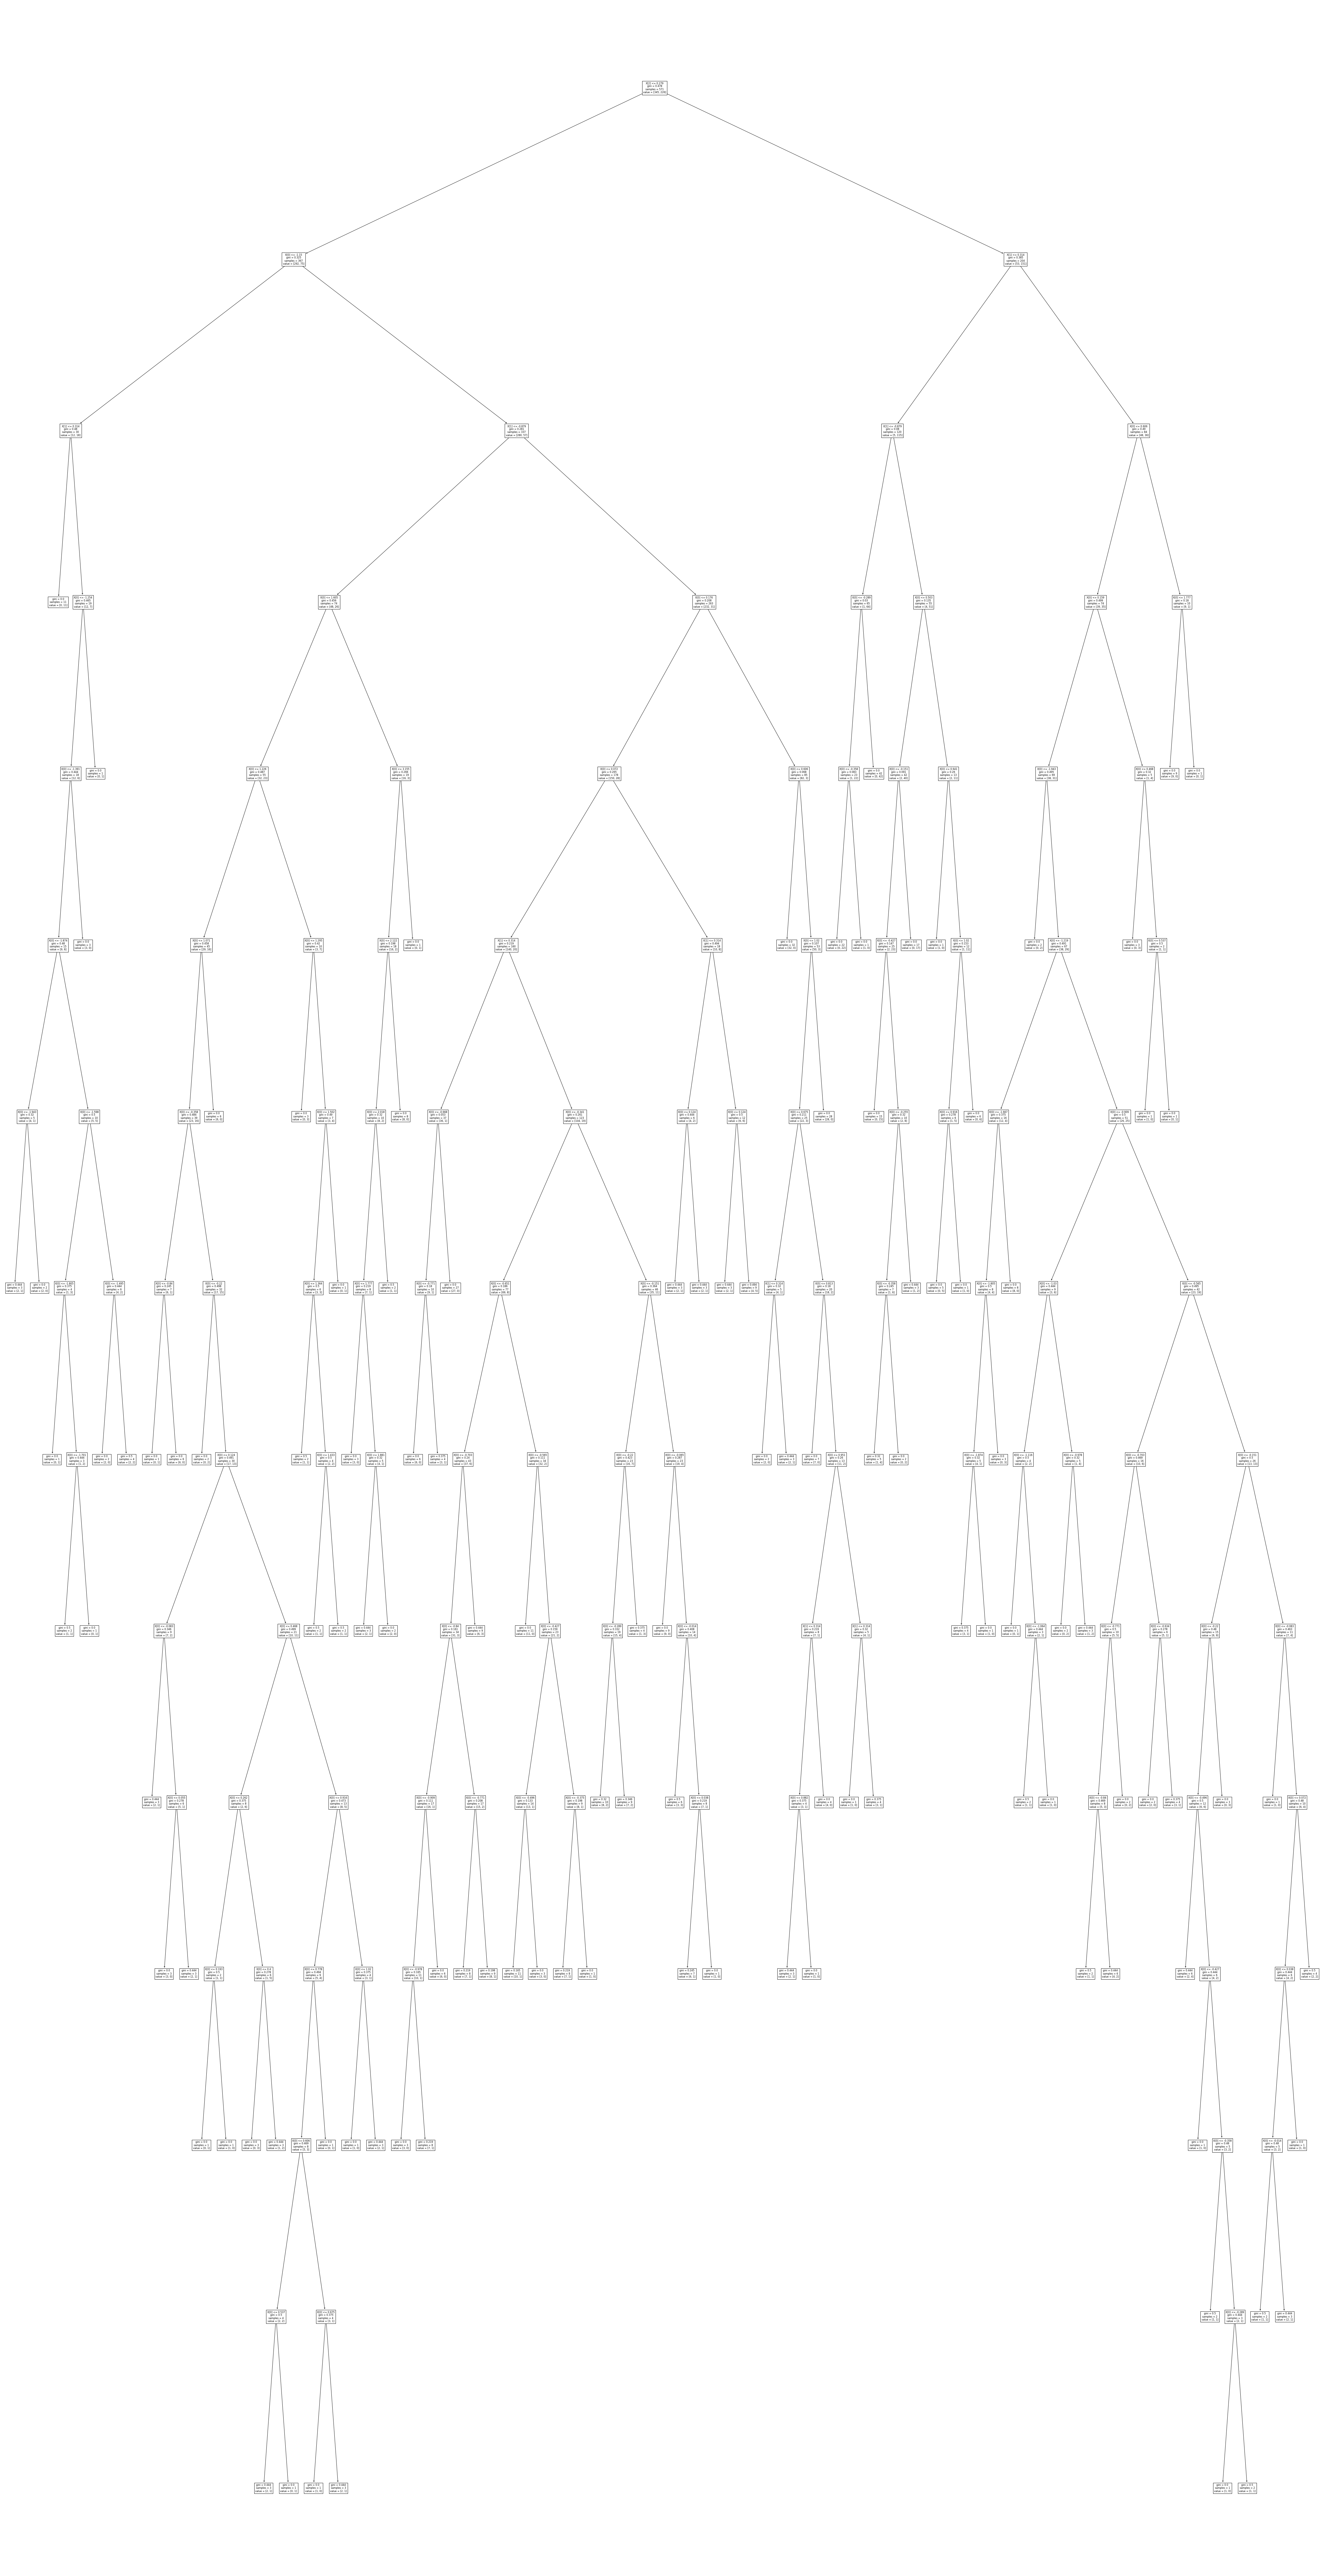

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(80,160))
_ = tree.plot_tree(clf)
                   
